In [125]:
%load_ext autoreload
%autoreload 2

import sci.learn as scil
import sci.features as scif

from sklearn.model_selection import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [123]:
data = scil.load_data("processed_my2")

X: (891, 16), y: (891,)
X_score: (418, 16)


In [128]:
data = scif.drop_str_features(data)

X_train = data.X_train
y_train = data.y_train
X_test = data.X_test
y_test = data.y_test
X = data.X
y = data.y
X_score = data.X_score

In [144]:
cls2 = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=60, 
    n_jobs=10,
    resampling_strategy='cv',
    resampling_strategy_arguments={'folds': 5},
)
cls2.fit(X_train, y_train)

Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (56.988576)
Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (56.760637)
Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (56.477368)
Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (56.424332)
Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (56.153128)
Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (56.121068)
[WARNING] [2019-03-14 22:40:56,829:EnsembleBuilder(1791095845):f0c3107b4bcc7cfc67600e67e2184677] No models better than random - using Dummy Score!
[WARNING] [20

AutoSklearnClassifier(delete_output_folder_after_terminate=False,
           delete_tmp_folder_after_terminate=False,
           disable_evaluator_output=False, ensemble_memory_limit=1024,
           ensemble_nbest=50, ensemble_size=50, exclude_estimators=None,
           exclude_preprocessors=None, get_smac_object_callback=None,
           include_estimators=None, include_preprocessors=None,
           initial_configurations_via_metalearning=25, logging_config=None,
           ml_memory_limit=3072, n_jobs=10, output_folder=None,
           per_run_time_limit=360, resampling_strategy='cv',
           resampling_strategy_arguments={'folds': 5}, seed=1,
           shared_mode=False, smac_scenario_args=None,
           time_left_for_this_task=60, tmp_folder=None)

In [140]:
cls2.refit(X_train, y_train)

AutoSklearnClassifier(delete_output_folder_after_terminate=False,
           delete_tmp_folder_after_terminate=False,
           disable_evaluator_output=False, ensemble_memory_limit=1024,
           ensemble_nbest=50, ensemble_size=50, exclude_estimators=None,
           exclude_preprocessors=None, get_smac_object_callback=None,
           include_estimators=None, include_preprocessors=None,
           initial_configurations_via_metalearning=25, logging_config=None,
           ml_memory_limit=3072, n_jobs=10, output_folder=None,
           per_run_time_limit=360,
           resampling_strategy=<class 'sklearn.model_selection._split.KFold'>,
           resampling_strategy_arguments={'n_splits': 5}, seed=1,
           shared_mode=False, smac_scenario_args=None,
           time_left_for_this_task=60, tmp_folder=None)

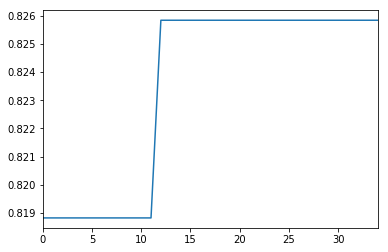

In [138]:
df = pd.DataFrame(cls2.cv_results_)
df.mean_test_score.cummax().plot()

In [145]:
y_pred = cls2.predict(X_train)
print(accuracy_score(y_train, y_pred))

y_pred = cls2.predict(X_test)
accuracy_score(y_test, y_pred)

NotImplementedError: Predict is currently not implemented for resampling strategy cv, please call refit().

In [142]:
scores = cross_val_score(cls2, X, y, scoring="accuracy", cv=5)
np.mean(scores)

Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (56.328022)
Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (56.184860)
Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (56.175165)
[WARNING] [2019-03-14 22:39:27,972:EnsembleBuilder(1791095845):c6324dc04fc07f0480be405e02864bc2] No models better than random - using Dummy Score!
[WARNING] [2019-03-14 22:39:27,987:EnsembleBuilder(1791095845):c6324dc04fc07f0480be405e02864bc2] No models better than random - using Dummy Score!
Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (56.188457)
Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (56.003814)
Time l

NotImplementedError: Predict is currently not implemented for resampling strategy <class 'sklearn.model_selection._split.KFold'>, please call refit().

In [58]:
import numpy as np
df = pd.DataFrame(cls.cv_results_)
idx = np.argmax(df.mean_test_score)
df.iloc[idx].params

{'balancing:strategy': 'none',
 'categorical_encoding:__choice__': 'one_hot_encoding',
 'classifier:__choice__': 'gradient_boosting',
 'imputation:strategy': 'mean',
 'preprocessor:__choice__': 'polynomial',
 'rescaling:__choice__': 'robust_scaler',
 'categorical_encoding:one_hot_encoding:use_minimum_fraction': 'True',
 'classifier:gradient_boosting:criterion': 'mae',
 'classifier:gradient_boosting:learning_rate': 0.011619566199432413,
 'classifier:gradient_boosting:loss': 'deviance',
 'classifier:gradient_boosting:max_depth': 10,
 'classifier:gradient_boosting:max_features': 0.5471641301798081,
 'classifier:gradient_boosting:max_leaf_nodes': 'None',
 'classifier:gradient_boosting:min_impurity_decrease': 0.0,
 'classifier:gradient_boosting:min_samples_leaf': 8,
 'classifier:gradient_boosting:min_samples_split': 15,
 'classifier:gradient_boosting:min_weight_fraction_leaf': 0.0,
 'classifier:gradient_boosting:n_estimators': 288,
 'classifier:gradient_boosting:subsample': 0.50921447413252

In [59]:
df = df.sort_values("mean_test_score", ascending=False)
df

,mean_test_score,mean_fit_time,params,rank_test_scores,status,param_balancing:strategy,param_categorical_encoding:__choice__,param_classifier:__choice__,param_imputation:strategy,param_preprocessor:__choice__,...,param_classifier:xgradient_boosting:normalize_type,param_classifier:xgradient_boosting:rate_drop,param_classifier:xgradient_boosting:sample_type,param_preprocessor:fast_ica:n_components,param_preprocessor:kernel_pca:coef0,param_preprocessor:kernel_pca:degree,param_preprocessor:kernel_pca:gamma,param_preprocessor:nystroem_sampler:coef0,param_preprocessor:nystroem_sampler:degree,param_preprocessor:nystroem_sampler:gamma
1533,0.85532,0.91598,"{'balancing:strategy': 'none', 'categorical_en...",1,Success,none,no_encoding,random_forest,median,polynomial,...,NaN,nan,NaN,nan,nan,nan,nan,nan,nan,nan
468,0.85532,3.08014,"{'balancing:strategy': 'none', 'categorical_en...",1,Success,none,one_hot_encoding,gradient_boosting,mean,polynomial,...,NaN,nan,NaN,nan,nan,nan,nan,nan,nan,nan
1584,0.85532,0.90701,"{'balancing:strategy': 'none', 'categorical_en...",1,Success,none,no_encoding,random_forest,most_frequent,polynomial,...,NaN,nan,NaN,nan,nan,nan,nan,nan,nan,nan
1011,0.85532,2.11774,"{'balancing:strategy': 'none', 'categorical_en...",1,Success,none,no_encoding,gradient_boosting,mean,polynomial,...,NaN,nan,NaN,nan,nan,nan,nan,nan,nan,nan
1034,0.85532,1.06687,"{'balancing:strategy': 'weighting', 'categoric...",1,Success,weighting,no_encoding,gradient_boosting,mean,polynomial,...,NaN,nan,NaN,nan,nan,nan,nan,nan,nan,nan
407,0.85532,19.45832,"{'balancing:strategy': 'none', 'categorical_en...",1,Success,none,one_hot_encoding,gradient_boosting,mean,polynomial,...,NaN,nan,NaN,nan,nan,nan,nan,nan,nan,nan
825,0.85532,0.67589,"{'balancing:strategy': 'none', 'categorical_en...",1,Success,none,no_encoding,random_forest,mean,select_rates,...,NaN,nan,NaN,nan,nan,nan,nan,nan,nan,nan
1126,0.85106,0.78612,"{'balancing:strategy': 'none', 'categorical_en...",8,Success,none,one_hot_encoding,random_forest,mean,polynomial,...,NaN,nan,NaN,nan,nan,nan,nan,nan,nan,nan
1236,0.85106,1.94280,"{'balancing:strategy': 'none', 'categorical_en...",8,Success,none,no_encoding,gradient_boosting,mean,polynomial,...,NaN,nan,NaN,nan,nan,nan,nan,nan,nan,nan
930,0.85106,0.91671,"{'balancing:strategy': 'weighting', 'categoric...",8,Success,weighting,no_encoding,xgradient_boosting,median,feature_agglomeration,...,forest,0.69500,weighted,nan,nan,nan,nan,nan,nan,nan


In [60]:
df.shape

(1708, 177)

In [61]:
cls.get_params()

{'delete_output_folder_after_terminate': True,
 'delete_tmp_folder_after_terminate': True,
 'disable_evaluator_output': False,
 'ensemble_memory_limit': 1024,
 'ensemble_nbest': 50,
 'ensemble_size': 50,
 'exclude_estimators': None,
 'exclude_preprocessors': None,
 'get_smac_object_callback': None,
 'include_estimators': None,
 'include_preprocessors': None,
 'initial_configurations_via_metalearning': 25,
 'logging_config': None,
 'ml_memory_limit': 3072,
 'n_jobs': None,
 'output_folder': None,
 'per_run_time_limit': 360,
 'resampling_strategy': 'holdout',
 'resampling_strategy_arguments': None,
 'seed': 1,
 'shared_mode': False,
 'smac_scenario_args': None,
 'time_left_for_this_task': 7200,
 'tmp_folder': None}

In [62]:
print(cls.show_models())

[(0.100000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'categorical_encoding:__choice__': 'no_encoding', 'classifier:__choice__': 'gradient_boosting', 'imputation:strategy': 'most_frequent', 'preprocessor:__choice__': 'polynomial', 'rescaling:__choice__': 'robust_scaler', 'classifier:gradient_boosting:criterion': 'friedman_mse', 'classifier:gradient_boosting:learning_rate': 0.013161497413930925, 'classifier:gradient_boosting:loss': 'deviance', 'classifier:gradient_boosting:max_depth': 3, 'classifier:gradient_boosting:max_features': 0.9946074052042089, 'classifier:gradient_boosting:max_leaf_nodes': 'None', 'classifier:gradient_boosting:min_impurity_decrease': 0.0, 'classifier:gradient_boosting:min_samples_leaf': 6, 'classifier:gradient_boosting:min_samples_split': 11, 'classifier:gradient_boosting:min_weight_fraction_leaf': 0.0, 'classifier:gradient_boosting:n_estimators': 376, 'classifier:gradient_boosting:subsample': 0.5691789610746165, 'preprocessor:polynomial:degree

In [63]:
print(cls.sprint_statistics())

auto-sklearn results:
  Dataset name: a60b8bc2aaf9c2caae6c334c4654b903
  Metric: accuracy
  Best validation score: 0.855319
  Number of target algorithm runs: 1708
  Number of successful target algorithm runs: 1425
  Number of crashed target algorithm runs: 274
  Number of target algorithms that exceeded the time limit: 9
  Number of target algorithms that exceeded the memory limit: 0



In [81]:
y_pred = cls2.predict(X_score)
y_pred = y_pred.astype(int)

In [82]:
# save submission using samples Ids
index = pd.read_csv('input/gender_submission.csv')["PassengerId"]
df_score = pd.DataFrame({"PassengerId": index, "Survived": y_pred})
df_score.to_csv('input/submission.csv', index=False)